In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('pbl1_data.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316214 entries, 0 to 1316213
Data columns (total 25 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1316214 non-null  int64  
 1   성별코드         1316214 non-null  int64  
 2   연령대코드(5세단위)  1316214 non-null  int64  
 3   신장(5Cm단위)    1316214 non-null  int64  
 4   체중(5Kg단위)    1316214 non-null  int64  
 5   허리둘레         1316214 non-null  float64
 6   수축기혈압        1316214 non-null  float64
 7   이완기혈압        1316214 non-null  float64
 8   총콜레스테롤       1316214 non-null  float64
 9   트리글리세라이드     1316214 non-null  float64
 10  HDL콜레스테롤     1316214 non-null  float64
 11  LDL콜레스테롤     1316214 non-null  float64
 12  혈색소          1316214 non-null  float64
 13  요단백          1316214 non-null  float64
 14  혈청크레아티닌      1316214 non-null  float64
 15  (혈청지오티)AST   1316214 non-null  float64
 16  (혈청지오티)ALT   1316214 non-null  float64
 17  감마지티피        1316214 non-null  float64
 18  흡연

In [62]:
print(df['당뇨병'].value_counts())

0    1211434
1     104780
Name: 당뇨병, dtype: int64


전체 1316214개의 데이터 중 Positive값 (1)이 104780개, Negative 값(0)dl 1211434개로 구성되어있다.

In [66]:
# 모델 평가를 위한 함수 설정
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    # 평가지표 출력
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [119]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_test, pred_proba):
  # threshold의 ndarray와 threshold 값별 정밀도, 재현율에 대한 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    f1 = 2 * (precisions * recalls) / (precisions + recalls)
  
  # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize = (8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle = "--", label = "precision")
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle = ":", label = 'recall')
    plt.plot(thresholds, f1[:thresholds_boundary], linestyle = ':',  label = 'f1')
    # thresholds의 값 X축 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(0, 1, 0.1), 2))

    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

In [120]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y 를 추출
X = df.iloc[:, :-1]
y = df['당뇨병']

# 데이터를 훈련과 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 156,
                                                    stratify = y)

# 로지스틱 회귀로 학습, 예측 및 평가를 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬:
 [[241770    517]
 [ 20767    189]]

정확도: 0.9191
정밀도: 0.2677
재현율: 0.0090
F1: 0.0174
AUC: 0.5034


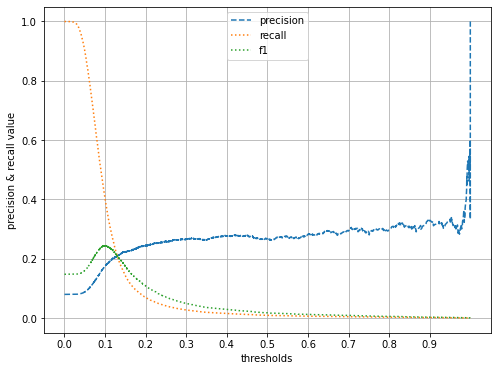

In [121]:
# 임계값별로 정밀도-재현율 시각화
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba)

위의 정밀도-재현율 그래프를 보면 임계값이 약 0.13정도 수준일 때, 정밀도와 재현율이 균형을 이루는것을 볼수있다.
이때 정밀도, 재현율은 높지않다

In [122]:
pd.options.display.float_format = '{:.2f}'.format

In [123]:
# 데이터의 기초 통계값들
df.describe()

,Unnamed: 0,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,총콜레스테롤,트리글리세라이드,...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,복부비만,BMI,BMI코드,고혈압,당뇨병
count,1316214.00,1316214.00,1316214.00,1316214.00,1316214.00,1316214.00,1316214.00,1316214.00,1316214.00,1316214.00,...,1316214.00,1316214.00,1316214.00,1316214.00,1316214.00,1316214.00,1316214.00,1316214.00,1316214.00,1316214.00
mean,500014.03,1.47,10.72,162.10,63.31,81.41,122.79,76.16,195.48,130.78,...,26.20,25.94,37.24,1.61,0.53,0.24,23.97,0.39,0.71,0.08
std,288672.45,0.50,2.82,9.35,12.48,9.52,14.59,9.90,38.91,95.10,...,23.81,26.09,50.18,0.82,0.50,0.43,3.50,0.58,0.70,0.27
min,0.00,1.00,5.00,125.00,25.00,40.00,63.00,29.00,30.00,1.00,...,1.00,1.00,1.00,1.00,0.00,0.00,12.49,0.00,0.00,0.00
25%,249998.00,1.00,9.00,155.00,55.00,75.00,112.00,70.00,169.00,74.00,...,19.00,15.00,16.00,1.00,0.00,0.00,21.48,0.00,0.00,0.00
50%,500174.50,1.00,11.00,160.00,60.00,81.00,121.00,76.00,193.00,107.00,...,23.00,20.00,23.00,1.00,1.00,0.00,23.88,0.00,1.00,0.00
75%,749948.00,2.00,13.00,170.00,70.00,88.00,131.00,82.00,219.00,159.00,...,29.00,30.00,40.00,2.00,1.00,0.00,25.95,1.00,1.00,0.00
max,999999.00,2.00,18.00,190.00,140.00,140.00,273.00,185.00,2386.00,9490.00,...,9999.00,7210.00,999.00,3.00,1.00,1.00,45.71,2.00,3.00,1.00


In [124]:
# 데이터 셋에 StandardScaler를 적용하여 변환하기
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터를 훈련과 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size = 0.2,
                                                    random_state = 156,
                                                    stratify = y)

# 로지스틱 회귀로 학습, 예측, 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬:
 [[241590    697]
 [ 20419    537]]

정확도: 0.9198
정밀도: 0.4352
재현율: 0.0256
F1: 0.0484
AUC: 0.5114


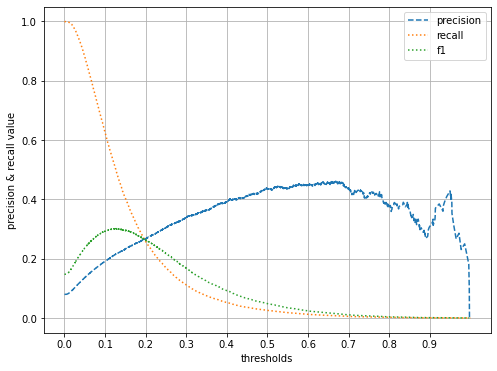

In [125]:
# 임계값별로 정밀도-재현율 시각화
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba)

In [126]:
# 평가지표를 조사하기 위한 새로운 함수 생성
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
      # thresholds list 객체 내의 값을 iteration하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        print('-----------------')

In [127]:
# 임계값 변화에 대한 예측 성능 확인
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값:  0.3
오차행렬:
 [[237714   4573]
 [ 18618   2338]]

정확도: 0.9119
정밀도: 0.3383
재현율: 0.1116
F1: 0.1678
AUC: 0.5463
-----------------
임계값:  0.33
오차행렬:
 [[238949   3338]
 [ 19125   1831]]

정확도: 0.9147
정밀도: 0.3542
재현율: 0.0874
F1: 0.1402
AUC: 0.5368
-----------------
임계값:  0.36
오차행렬:
 [[239790   2497]
 [ 19497   1459]]

정확도: 0.9164
정밀도: 0.3688
재현율: 0.0696
F1: 0.1171
AUC: 0.5297
-----------------
임계값:  0.39
오차행렬:
 [[240438   1849]
 [ 19792   1164]]

정확도: 0.9178
정밀도: 0.3863
재현율: 0.0555
F1: 0.0971
AUC: 0.5240
-----------------
임계값:  0.42
오차행렬:
 [[240901   1386]
 [ 20029    927]]

정확도: 0.9186
정밀도: 0.4008
재현율: 0.0442
F1: 0.0797
AUC: 0.5193
-----------------
임계값:  0.45
오차행렬:
 [[241213   1074]
 [ 20204    752]]

정확도: 0.9192
정밀도: 0.4118
재현율: 0.0359
F1: 0.0660
AUC: 0.5157
-----------------
임계값:  0.48
오차행렬:
 [[241449    838]
 [ 20343    613]]

정확도: 0.9195
정밀도: 0.4225
재현율: 0.0293
F1: 0.0547
AUC: 0.5129
-----------------
임계값:  0.5
오차행렬:
 [[241590    697]
 [ 20419    537]]

정확도: 0.9198
정밀도: 0.4352
재현율: 0.

In [128]:
# 임계값을 0.5로 설정하여 예측 수행
binarizer = Binarizer(threshold = 0.5)

# Binarizer를 이용하여 예측값 반환
pred_th_050 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1)) 

get_clf_eval(y_test, pred_th_050)

오차행렬:
 [[241590    697]
 [ 20419    537]]

정확도: 0.9198
정밀도: 0.4352
재현율: 0.0256
F1: 0.0484
AUC: 0.5114


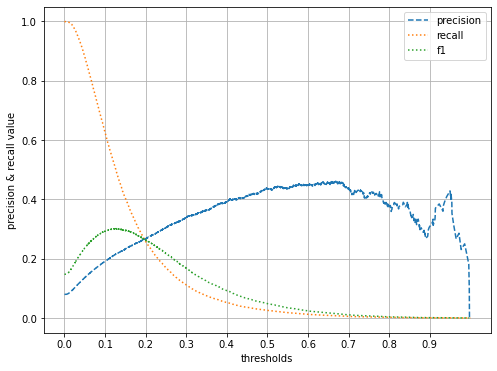

In [129]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba)